In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #pip install matplotlib if error

BvsP = pd.read_table('Brent Historical Data.csv',delimiter =';')

print(BvsP)
BvsP.head()

BvsP[['Date','BRE']]
#plt.plot(BvsP['Date'],BvsP['BRE'],'x')
#plt.show()

#plt.scatter(BvsP['Date'],BvsP['BRE'],marker='o')
#plt.show()

BvsP.iloc[0:2,:]

df = pd.DataFrame({'A': range(4), 'B': [2*i for i in range(4)]})
df['A'].corr(df['B'])

BvsP = BvsP.stack().str.replace(',','.').unstack()
BvsP=BvsP.fillna(0)
print(BvsP)


BvsP.dtypes
BvsP =BvsP.iloc[:,1:11].astype(float)
A =BvsP.corr(method = 'kendall')

brdiff = pd.read_table('Historical marker crude prices_csv.csv',delimiter =';')
brdiff = brdiff.stack().str.replace(',','.').unstack()
#brdiff=brdiff.fillna(0)
print(brdiff)

brdiff.dtypes
brdiff =brdiff.iloc[:,1:11].astype(float)
B = brdiff.corr(method = 'kendall')

brdiff.corr(method = 'kendall')










           Date    BRE    PRO     BUT     NAP  UNL91   UNL95     ETH     JET  \
0     09.jan.98  15,13  155,1   155,6  159,45  165,5   169,5     NaN   167,4   
1     16.jan.98  14,91  140,8   148,8   156,8    163     167     NaN     161   
2     23.jan.98  14,65    133     145     156  160,3   164,3     NaN   159,1   
3     30.jan.98  15,64  134,7     145   156,1  159,4   163,4     NaN     160   
4     06.feb.98  14,71  151,6   150,2   153,6    159     163     NaN   154,5   
...         ...    ...    ...     ...     ...    ...     ...     ...     ...   
1125  02.aug.19  62,64    300     274  491,65      0  632,75  703,87  636,95   
1126  09.aug.19  57,54  265,4  256,55   439,2      0  585,55  672,27   596,6   
1127  16.aug.19  58,31    273   288,3  441,05      0  586,65  642,21  605,25   
1128  23.aug.19  59,48  284,6   298,6   447,9      0   582,2  620,94  609,25   
1129  30.aug.19  59,63    300   304,5  443,88      0  580,63  593,11  608,31   

      DIESEL  ... Field5 Field6 Field7 

Dated Brent  Bonny light      Mars       WTI  Maya Europe  \
Dated Brent     1.000000     0.604977  0.294419 -0.306810    -0.087840   
Bonny light     0.604977     1.000000  0.169516 -0.084018    -0.026620   
Mars            0.294419     0.169516  1.000000 -0.733201     0.103416   
WTI            -0.306810    -0.084018 -0.733201  1.000000     0.056024   
Maya Europe    -0.087840    -0.026620  0.103416  0.056024     1.000000   
Maya USGC      -0.375080    -0.316688  0.105756  0.060004     0.453346   
ESPO           -0.204021    -0.192815 -0.039142  0.019110     0.005783   
Urals NWE      -0.046664    -0.057376  0.389894 -0.113127     0.411435   
Urals MED       0.038156    -0.046945  0.397922 -0.139125     0.263126   
Dubai          -0.186628    -0.213390  0.211935  0.082417     0.375655   

             Maya USGC      ESPO  Urals NWE  Urals MED     Dubai  
Dated Brent  -0.375080 -0.204021  -0.046664   0.038156 -0.186628  
Bonny light  -0.316688 -0.192815  -0.057376  -0.046945 -0.213390  
Mars          0.105756 -0.039142   0.389894   0.397922  0.211935  
WTI           0.060004  0.019110  -0.113127  -0.139125  0.082417  
Maya Europe   0.453346  0.005783   0.411435   0.263126  0.375655  
Maya USGC     1.000000  0.291557   0.406264   0.333056  0.488654  
ESPO          0.291557  1.000000   0.236233   0.336361  0.448936  
Urals NWE     0.406264  0.236233   1.000000   0.756718  0.503028  
Urals MED     0.333056  0.336361   0.756718   1.000000  0.471161  
Dubai         0.488654  0.448936   0.503028   0.471161  1.000000

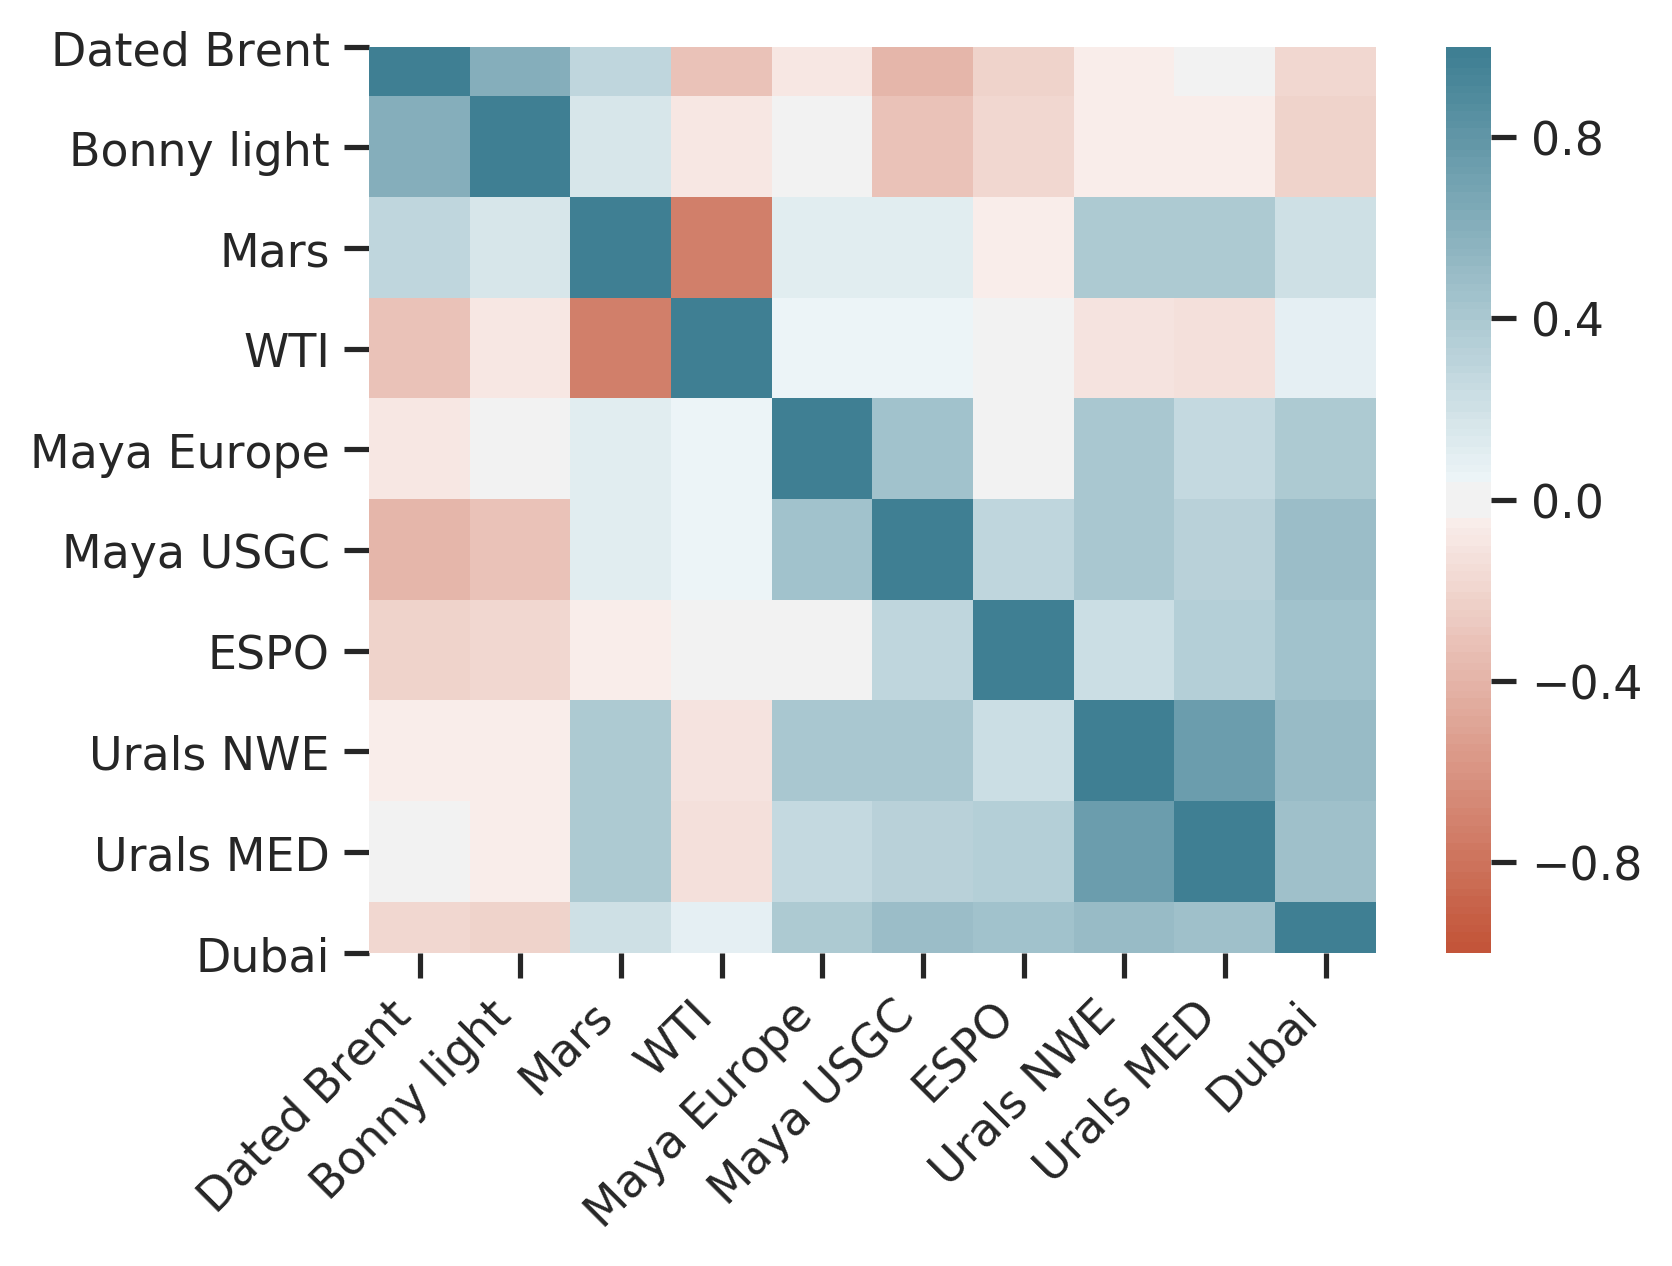

In [8]:


import seaborn as sns

plt.rcParams['figure.dpi'] = 300
#plt.figure(figsize=(15,15))
ax = sns.heatmap(B,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);





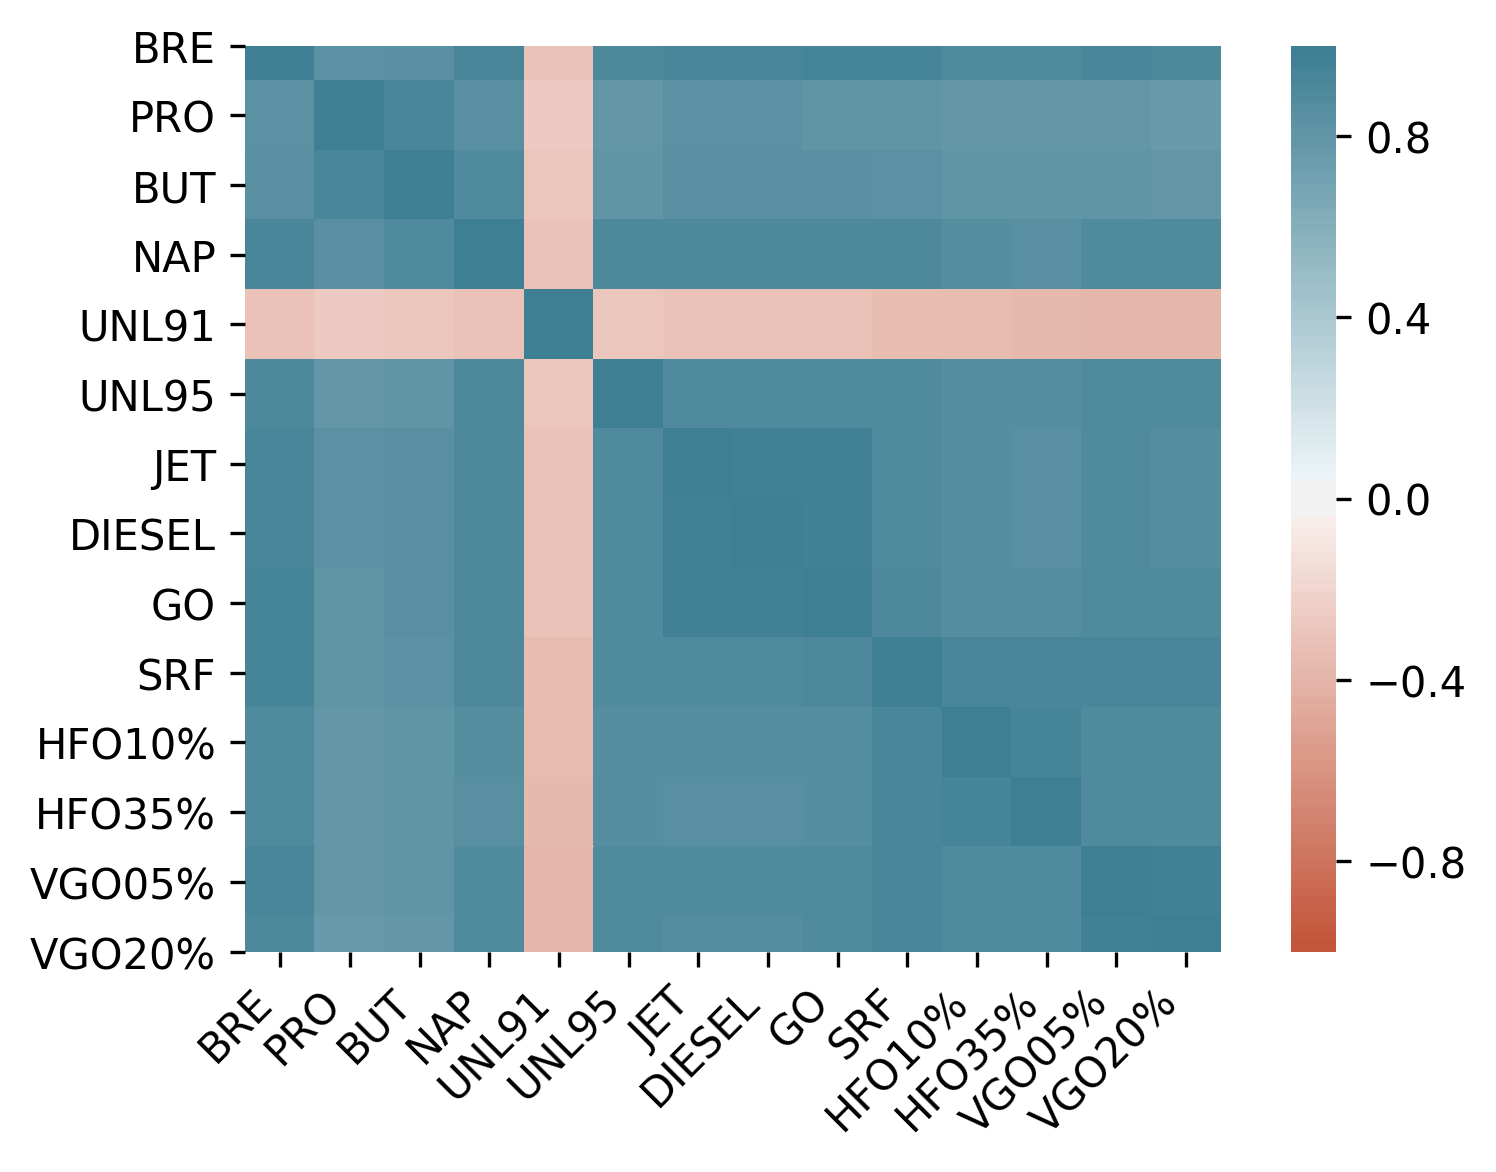

In [7]:
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
#plt.figure(figsize=(15,15))
ax = sns.heatmap(A,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


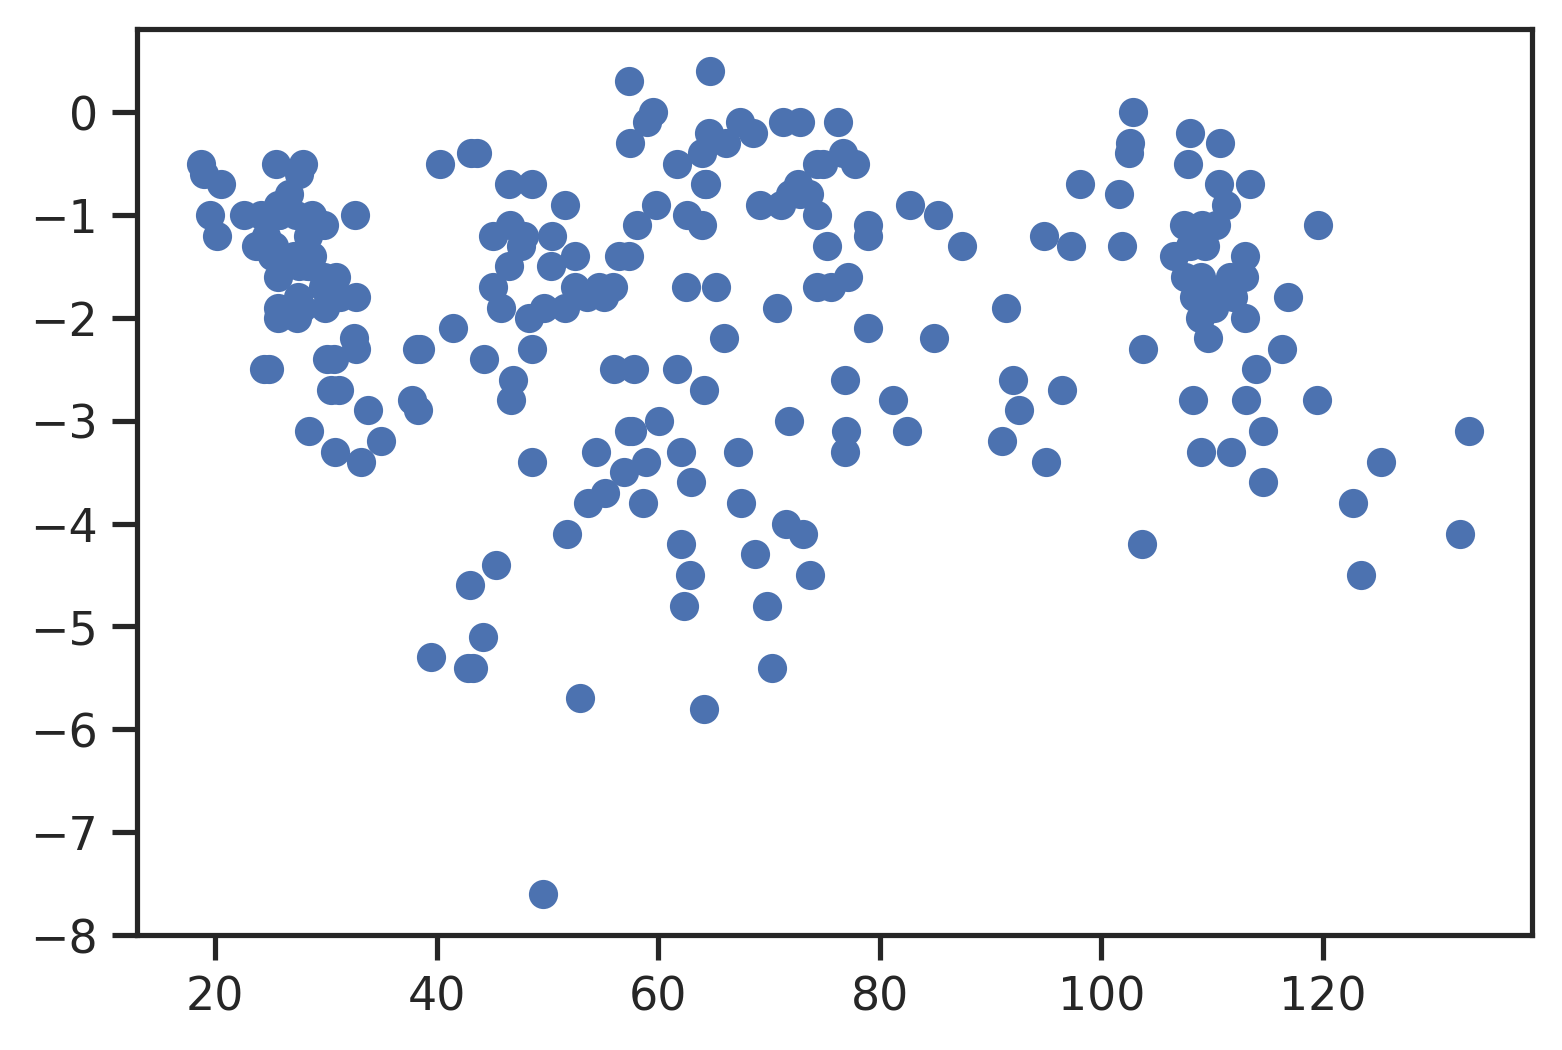

In [9]:
plt.scatter(brdiff.iloc[:,0],brdiff.iloc[:,7])



sns.set(style="ticks", color_codes=True)
g = sns.pairplot(brdiff)
g = sns.pairplot(brdiff,kind ="reg")




In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

brdiff["Dated Brent scaled"] = scaler.fit_transform(brdiff["Dated Brent"].to_frame())

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
#X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
#Y = df['Stock_Index_Price']
 
# with sklearn
#regr = linear_model.LinearRegression()
#regr.fit(X, Y)

X = brdiff[['Dated Brent','Mars']]
Y = brdiff['Bonny light']
